## Estimation d’une incertitude-type par une méthode numérique de type Monte-Carlo 

### Titrage avec suivi pHmétrique
Remarque : Si les numéros des lignes ne s'affichent pas dans le notebook, les afficher en utilisant le menu view puis en selectionnant Toggle Line Numbers.

Concentration molaire de la solution commerciale 12.160149768176375
u(C) : 0.03633665168747501


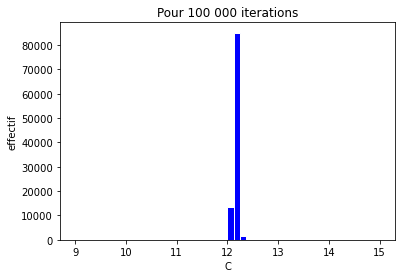

In [12]:
import numpy as np
from matplotlib import pyplot
###################################################################
#Renvoie une valeur aléatoire de la variable L[0] d'incertitude-type L[1]
def Alea(L):
    tirage=np.random.normal()
    return L[0]+L[1]*tirage
###################################################################
###################################################################
#Entrées [ valeur, incertitude-type ]
CB=[0.2,0]
VBE=[15.2,0]
VA=[10,0.03]
###################################################################
###################################################################
#Méthode de Monte Carlo pour le calcul de C
LC=[]
Iteration=100000
for j in range(Iteration):
    AleaC=40*Alea(CB)*Alea(VBE)/Alea(VA)  #Relation qui permet de calculer C
    LC.append(AleaC)
MoyC=sum(LC)/Iteration
uC=(1/(Iteration-1)*sum((np.array(LC)-MoyC)**2.))**0.5
###################################################################
###################################################################
#Affichage des résultats
print('Concentration molaire de la solution commerciale', MoyC)
print('u(C) :',uC)
pyplot.hist(LC, range = (9, 15), bins = 50, color = 'blue', edgecolor = 'white')
pyplot.xlabel('C')
pyplot.ylabel('effectif')
pyplot.title('Pour 100 000 iterations')
pyplot.show()
###################################################################


## Pour aller plus loin : principe de la méthode Monte-Carlo
Le programme ci-dessus permet d’évaluer l’incertitude sur la concentration de la solution en acide chlorhydrique en tenant compte des différentes sources d’incertitudes liées au matériel utilisé.
Sous certaines conditions,non détaillées ici, on montre en mathématiques que les résultats d'une suite d'expériences aléatoires similaires et indépendantes lorsque le nombre d'expériences est très élevé suivent une loi normale de probabilité. 
On peut appréhender l'allure de cette loi de probabilité en utilisant l'animation ci-dessous :
<br>
<div class="row">
  <div class="col-md-8" markdown="1" border="1">
  <a href="https://phet.colorado.edu/sims/html/plinko-probability/latest/plinko-probability_fr.html" target="_blank"><img src="https://github.com/dblanqui/terminalePC/blob/master/images/plinko.png?raw=true" /></a>
  </div>
  <div class="col-md-4" markdown="1">
      <h4>Appréhender une distribution normale :</h4>
      <ol><br>
  <li>Utiliser cette <a href="https://phet.colorado.edu/sims/html/plinko-probability/latest/plinko-probability_fr.html" target="_blank">animation</a> et choisir explore 2D. Choisir un flux continu de balles et lancer l'animation.<img src="https://github.com/dblanqui/terminalePC/blob/master/images/plinko2.png?raw=true" /></li><br>
          <li>Observer pour un grand nombre de balles, la répartition des points de chutes.</li>
      </ol>
  </div>
</div>
<br>
La simulation de Monte-Carlo, utilisée dans le programme ci-dessous utilise cette loi de probabilité pour simuler un grand nombre N d'expériences (ci-dessous N=100000 ligne 18) : le simulateur génère d’un jeu de N données aléatoires pour chaque grandeur physique « mesurée », en accord avec la loi de probabilité de chacune d’elle (loi normale): fonction Alea. Puis il calcule pour chaque jeu de données la valeur de la grandeur physique de sortie => on obtient ainsi un jeu de N valeurs calculées de la grandeur physique de sortie (lignes 19 à 21). La valeur retenue est alors la valeur moyenne de l’ensemble de ce jeu de N valeurs et l’incertitude-type sera l’écart-type de la distribution de ces N valeurs (lignes 22 et 23).